# WeatherPy
Code randomly generates coordinate pairs (lat,lng) and imports the closest located cities. From there, it utilizes data from openweathermap.org to give several weather measurements for each location. After graphing global weather phenomenon, we split the data into the Northern and Southern hemispheres to test weather conditions against distance from the equator. 

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid="+ weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+'&q='+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chulman
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | prince rupert
Processing Record 6 of Set 1 | bengkulu
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | te anau
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | hofn
Processing Record 11 of Set 1 | molteno
Processing Record 12 of Set 1 | tarudant
City not found. Skipping...
Processing Record 13 of Set 1 | dunedin
Processing Record 14 of Set 1 | seoul
Processing Record 15 of Set 1 | pueblo bello
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | kardla
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | comiso
Processing Record 20 of Set 1 | ugoofaaru
Processing Record 21 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 22 of Set 1 | jamestown
P

Processing Record 35 of Set 4 | ayan
Processing Record 36 of Set 4 | clyde river
Processing Record 37 of Set 4 | carnarvon
Processing Record 38 of Set 4 | hokitika
Processing Record 39 of Set 4 | lasa
Processing Record 40 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 4 | ketchikan
Processing Record 42 of Set 4 | inirida
Processing Record 43 of Set 4 | karimganj
Processing Record 44 of Set 4 | egvekinot
Processing Record 45 of Set 4 | vanderhoof
Processing Record 46 of Set 4 | tessalit
Processing Record 47 of Set 4 | padang
Processing Record 48 of Set 4 | yuancheng
Processing Record 49 of Set 4 | diamantino
Processing Record 0 of Set 5 | qeshm
Processing Record 1 of Set 5 | olafsvik
Processing Record 2 of Set 5 | yulara
Processing Record 3 of Set 5 | portland
Processing Record 4 of Set 5 | lesnoy
Processing Record 5 of Set 5 | sisimiut
Processing Record 6 of Set 5 | cayenne
Processing Record 7 of Set 5 | berdyuzhye
City not found. Skipping...
Processing 

Processing Record 27 of Set 8 | severobaykalsk
Processing Record 28 of Set 8 | yuci
Processing Record 29 of Set 8 | los palacios
Processing Record 30 of Set 8 | albury
Processing Record 31 of Set 8 | karlstad
Processing Record 32 of Set 8 | ascension
Processing Record 33 of Set 8 | kaeo
Processing Record 34 of Set 8 | nova varos
Processing Record 35 of Set 8 | lorengau
Processing Record 36 of Set 8 | ihosy
Processing Record 37 of Set 8 | pimentel
Processing Record 38 of Set 8 | sines
Processing Record 39 of Set 8 | leh
Processing Record 40 of Set 8 | cidreira
Processing Record 41 of Set 8 | tres picos
Processing Record 42 of Set 8 | vestmanna
Processing Record 43 of Set 8 | bousso
Processing Record 44 of Set 8 | mastic beach
Processing Record 45 of Set 8 | baruun-urt
Processing Record 46 of Set 8 | na klang
Processing Record 47 of Set 8 | shizilu
Processing Record 48 of Set 8 | mabay
Processing Record 49 of Set 8 | gay
Processing Record 0 of Set 9 | zhigansk
Processing Record 1 of Set 

Processing Record 15 of Set 12 | tawau
Processing Record 16 of Set 12 | souillac
Processing Record 17 of Set 12 | alice springs
Processing Record 18 of Set 12 | edd
Processing Record 19 of Set 12 | tshikapa
Processing Record 20 of Set 12 | port macquarie
Processing Record 21 of Set 12 | banda aceh
Processing Record 22 of Set 12 | labuhan
Processing Record 23 of Set 12 | quesnel
Processing Record 24 of Set 12 | beringovskiy
Processing Record 25 of Set 12 | kawalu
Processing Record 26 of Set 12 | atikokan
Processing Record 27 of Set 12 | melfi
Processing Record 28 of Set 12 | aswan
Processing Record 29 of Set 12 | sinkat
City not found. Skipping...
Processing Record 30 of Set 12 | talcher
Processing Record 31 of Set 12 | gizo
Processing Record 32 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 33 of Set 12 | talawdi
City not found. Skipping...
Processing Record 34 of Set 12 | samaipata
Processing Record 35 of Set 12 | moffat
Processing Record 36 of Set 12 | havoysund


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chulman,56.8479,124.9104,-12.33,100,100,1.83,RU,1675621225
1,bluff,-46.6000,168.3333,59.40,87,94,33.62,NZ,1675621151
2,nikolskoye,59.7035,30.7861,22.91,83,100,7.36,RU,1675620993
3,castro,-24.7911,-50.0119,75.00,64,78,5.37,BR,1675621227
4,prince rupert,54.3161,-130.3201,40.69,79,100,8.05,CA,1675621006


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chulman,56.8479,124.9104,-12.33,100,100,1.83,RU,1675621225
1,bluff,-46.6000,168.3333,59.40,87,94,33.62,NZ,1675621151
2,nikolskoye,59.7035,30.7861,22.91,83,100,7.36,RU,1675620993
3,castro,-24.7911,-50.0119,75.00,64,78,5.37,BR,1675621227
4,prince rupert,54.3161,-130.3201,40.69,79,100,8.05,CA,1675621006


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

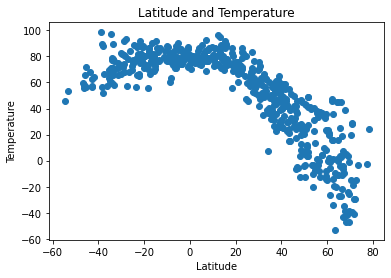

In [12]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude and Temperature')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

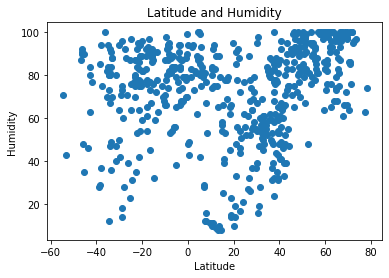

In [13]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude and Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

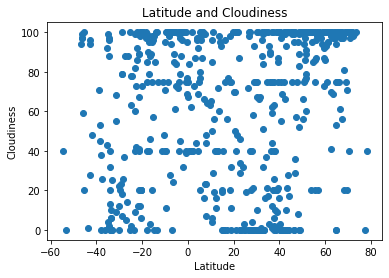

In [14]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude and Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

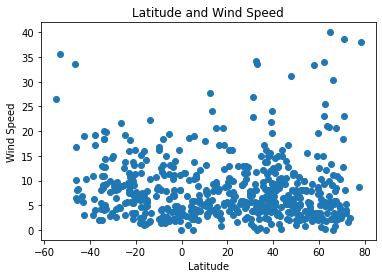

In [15]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude and Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def line_regress(x_values, y_values, title,label_location):
    #math it
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values) #should this be stats.linregress?
    regress_values = x_values * slope + intercept
    equation="y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    #plot it
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(equation,label_location,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.show()
    print (f"R value is equal to {rvalue**2}")

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chulman,56.8479,124.9104,-12.33,100,100,1.83,RU,1675621225
2,nikolskoye,59.7035,30.7861,22.91,83,100,7.36,RU,1675620993
4,prince rupert,54.3161,-130.3201,40.69,79,100,8.05,CA,1675621006
6,tasiilaq,65.6145,-37.6368,24.96,83,100,9.10,GL,1675621228
9,hofn,64.2539,-15.2082,45.03,99,100,20.85,IS,1675621122


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bluff,-46.6000,168.3333,59.40,87,94,33.62,NZ,1675621151
3,castro,-24.7911,-50.0119,75.00,64,78,5.37,BR,1675621227
5,bengkulu,-3.8004,102.2655,74.17,91,99,7.05,ID,1675621228
7,te anau,-45.4167,167.7167,56.86,90,100,8.25,NZ,1675621229
8,cape town,-33.9258,18.4232,71.35,81,20,18.41,ZA,1675621230


###  Temperature vs. Latitude Linear Regression Plot

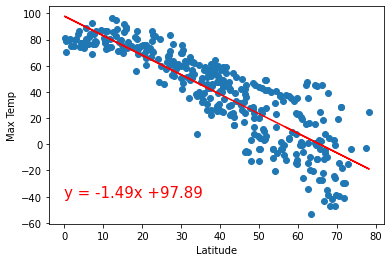

R value is equal to 0.7554658272333298


In [53]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
line_regress(x_values,y_values,"Max Temp",(0,-40))

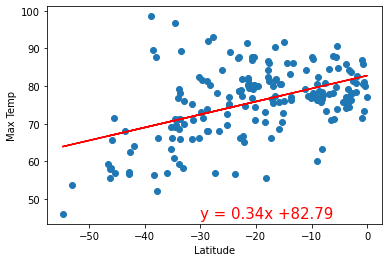

R value is equal to 0.22528038049480414


In [54]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
line_regress(x_values,y_values,"Max Temp",(-30,45))

**Discussion about the linear relationship:** There is a correlation between latitude and highest recorded temperature. As expected, there is a tendency for temperatures to increase as you approach the equator from both the northern and southern hemispheres. Interestingly, there is considerably more variance from that pattern in the southern hemisphere, especially in the band between 30 and 40 degrees latitude south of the equator. 

### Humidity vs. Latitude Linear Regression Plot

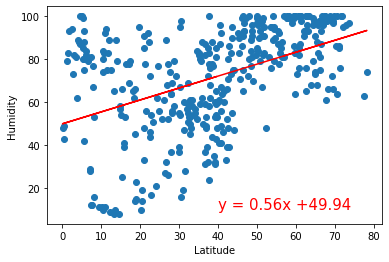

R value is equal to 0.21088152631734478


In [55]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
line_regress(x_values,y_values,"Humidity",(40,10))

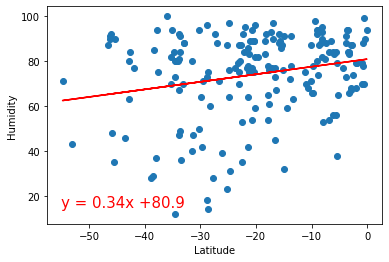

R value is equal to 0.05304566182719631


In [56]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
line_regress(x_values,y_values,"Humidity",(-55,15))

**Discussion about the linear relationship:** There is not a significant correlation between humidity and latitude in either hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

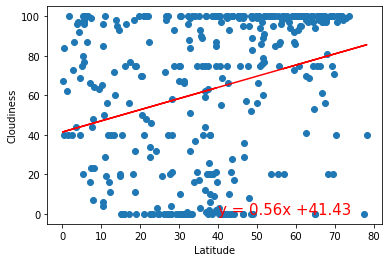

R value is equal to 0.08617388706879518


In [61]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
line_regress(x_values,y_values,"Cloudiness",(40,0))

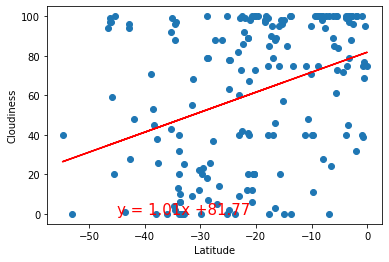

R value is equal to 0.12777161092028325


In [58]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
line_regress(x_values,y_values,"Cloudiness",(-45,0))

**Discussion about the linear relationship:** There is no correlation between cloudiness and latitude in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

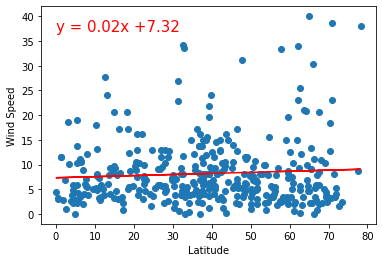

R value is equal to 0.004304666712503223


In [59]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
line_regress(x_values,y_values,"Wind Speed",(0,37))

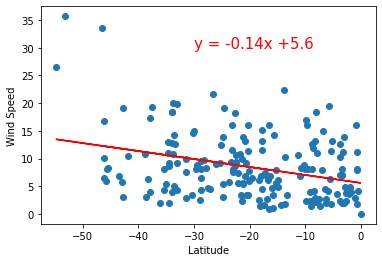

R value is equal to 0.10046392893953308


In [60]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
line_regress(x_values,y_values,"Wind Speed",(-30,30))

**Discussion about the linear relationship:** There is not a correlation between wind speed and latitude in either hemisphere.